In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
recipes_df = pd.read_pickle('recipes.pkl')
interactions_df = pd.read_pickle('interactions.pkl')
food_df = pd.read_pickle('food.pkl')

In [10]:
#Kiem tra kich thuoc cua du lieu
print(recipes_df.shape)
print(interactions_df.shape)
print(food_df.shape)

(221617, 25)
(1071520, 6)
(216952, 28)


In [11]:
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,...,protein,saturated_fat,carbohydrates,submitted_month,submitted_year,dairy-free,gluten-free,low-carb,vegan,vegetarian
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",...,2.0,0.0,4.0,Sep,2005,0,0,0,0,1
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",...,22.0,35.0,1.0,Jun,2002,0,0,0,0,0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",...,39.0,27.0,5.0,Feb,2005,0,0,0,0,0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",...,14.0,8.0,20.0,Apr,2003,0,0,0,0,0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",...,3.0,0.0,28.0,Oct,2002,0,0,0,0,1


In [12]:
interactions_df.head()

,user_id,recipe_id,date,rating,review_month,review_year
0,38094,40893,2003-02-17,4,Feb,2003
1,1293707,40893,2011-12-21,5,Dec,2011
2,8937,44394,2002-12-01,4,Dec,2002
3,126440,85009,2010-02-27,5,Feb,2010
4,57222,85009,2011-10-01,5,Oct,2011


In [13]:
recipes_df.describe()

,minutes,submitted,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,submitted_year,dairy-free,gluten-free,low-carb,vegan,vegetarian
count,221617.000000,221617,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000,221617.000000
mean,117.729218,2006-11-03 01:38:54.476145408,8.954363,8.878209,463.041153,35.191813,82.467320,29.726650,34.057694,44.219388,15.183023,2006.358303,0.000844,0.025188,0.185609,0.044130,0.155376
min,0.000000,1999-08-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2004-09-02 00:00:00,6.000000,6.000000,171.600000,8.000000,9.000000,5.000000,6.000000,7.000000,4.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,2007-01-15 00:00:00,8.000000,9.000000,307.900000,20.000000,24.000000,14.000000,18.000000,22.000000,9.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,2008-10-18 00:00:00,12.000000,11.000000,510.100000,40.000000,67.000000,32.000000,50.000000,51.000000,16.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,288000.000000,2018-12-04 00:00:00,21.000000,43.000000,434360.200000,17183.000000,362729.000000,29338.000000,6552.000000,10395.000000,36098.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,1965.546000,NaN,4.461082,3.598013,1189.503644,76.612243,811.013593,131.934725,57.051943,94.800054,82.754460,2.981621,0.029036,0.156695,0.388791,0.205385,0.362264


 Nutrition Analysis


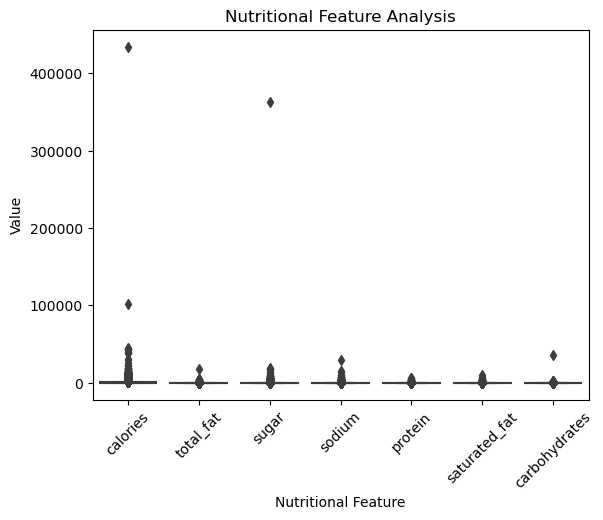

In [17]:
#Lua chon cac cot dinh duong de phan tich
nutrients = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']

sns.boxplot(data=recipes_df[nutrients])
plt.xlabel('Nutritional Feature')
plt.ylabel('Value')
plt.title('Nutritional Feature Analysis')
plt.xticks(rotation = 45)
plt.show()


Correlation Analysis


In [18]:
merged_df = pd.merge(recipes_df, interactions_df, left_on = 'id', right_on = 'recipe_id')

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032305 entries, 0 to 1032304
Data columns (total 31 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   name             1032305 non-null  object        
 1   id               1032305 non-null  object        
 2   minutes          1032305 non-null  int64         
 3   contributor_id   1032305 non-null  object        
 4   submitted        1032305 non-null  datetime64[ns]
 5   tags             1032305 non-null  object        
 6   nutrition        1032305 non-null  object        
 7   n_steps          1032305 non-null  int64         
 8   steps            1032305 non-null  object        
 9   ingredients      1032305 non-null  object        
 10  n_ingredients    1032305 non-null  int64         
 11  calories         1032305 non-null  float64       
 12  total_fat        1032305 non-null  float64       
 13  sugar            1032305 non-null  float64       
 14  so